<a href="https://colab.research.google.com/github/katdask/Data_Science_Projects/blob/main/Facial_Expressions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/facial_expressions/

/content/drive/MyDrive/facial_expressions


In [ ]:
import tarfile
fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

### Load & Prepare the Data

In [ ]:
photos=pd.read_csv("fer2013/fer2013.csv", usecols=[0,1])
photos.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
# Check distrubution of data instances through the 7 classes (dataset imbalanced mainly due to small representation of 1 (Discust) class)
photos.groupby('emotion').size()

emotion
0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
dtype: int64

In [ ]:
emotion_labels = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

In [ ]:
photos.rename(columns = {' pixels':'pixels'}, inplace = True)
list(photos.keys())

['emotion', 'pixels']

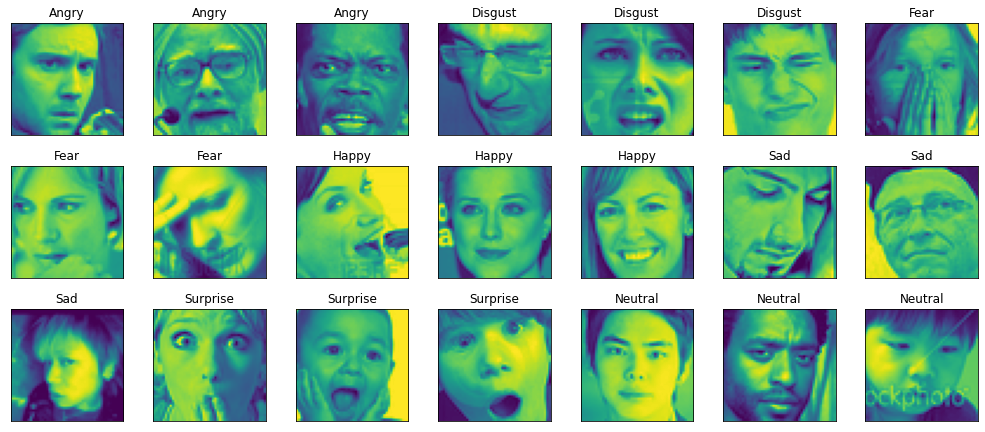

In [ ]:
# Visualize a sample of the data with their labels

fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(photos.emotion.unique()):
    for j in range(3):
        px = photos[photos.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_labels[label])
        plt.tight_layout()

In [ ]:
# Transform data to 48x48 arrays to be processed by keras CNNs
photos_array = photos.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
photos_array = np.stack(photos_array, axis=0)
photos_array.shape

(35887, 48, 48, 1)

In [ ]:
# Define Labels (classes)
classes = photos.emotion.values
classes.shape

(35887,)

In [ ]:
# Split train - test sets (stratify by "y" to assure representation of all classes)
X, X_test, y, y_test = train_test_split(photos_array, classes, test_size=0.20, random_state=82, stratify=classes)

In [ ]:
# Split train - validation sets (stratify by "y" to assure representation of all classes)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2021, stratify=y)

In [ ]:
# Normalize values of training, validation & test sets (to values 0-1)
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# check train set has proper shape
X_train.shape

(22967, 48, 48, 1)

### Built 3 CNN models (of increased complexity)

In [ ]:
# built very simple CNN model

model1 = keras.Sequential()

model1.add(layers.Conv2D(64, 3, activation="relu", input_shape=(48, 48, 1), padding="valid"))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Conv2D(64, 3, activation="relu", padding="valid"))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation="relu"))
model1.add(layers.Dense(7, activation="softmax"))

model1.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dense_33 (Dense)             (None, 7)               

In [ ]:
# built a more complex CNN model

model2 = keras.Sequential()

model2.add(layers.Conv2D(32, 3, activation="relu", input_shape=(48, 48, 1), padding="same"))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(64, 3, activation="relu", padding="same"))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(128, 3, activation="relu", padding="same"))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(256, 3, activation="relu", padding="same"))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Flatten())
model2.add(layers.Dense(1000, activation="relu"))
model2.add(layers.Dense(7, activation="softmax"))

model2.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 6, 6, 256)       

In [ ]:
# built an even more complex model (wide & deep) CNN
model3 = keras.Sequential()

model3.add(layers.Conv2D(64, 3, activation="relu", input_shape=(48, 48, 1), padding="same"))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(64, 3, activation="relu", padding="same"))
model3.add(layers.BatchNormalization())

model3.add(layers.MaxPooling2D(2,2))

model3.add(layers.Conv2D(128, 3, activation="relu", padding="same"))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(128, 3, activation="relu", padding="same"))
model3.add(layers.BatchNormalization())

model3.add(layers.MaxPooling2D(2,2))

model3.add(layers.Conv2D(256, 3, activation="relu", name="Conv3_1", padding="same"))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(256, 3, activation="relu", name="Conv3_2", padding="same"))
model3.add(layers.BatchNormalization())

model3.add(layers.MaxPooling2D(2,2))

model3.add(layers.Conv2D(512, 3, activation="relu", name="Conv4_1", padding="same"))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.2))
model3.add(layers.Conv2D(512, 3, activation="relu", name="Conv4_2", padding="same"))
model3.add(layers.BatchNormalization())

model3.add(layers.MaxPooling2D(2,2))

model3.add(layers.Flatten())
model3.add(layers.Dense(4608, activation="relu", name="Dense1"))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(1000, activation="relu", name="Dense2"))
#model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(7, activation="softmax", name="Prediction"))

model3.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_72 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
dropout_48 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_73 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 128)     

In [ ]:
# create "checkpoint" folder (if not exists) to store best models
import os
try:
    os.mkdir('checkpoint')
except:
    pass

In [ ]:
# We specify the training configuration (optimizer, loss, metrics):

model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
file_name1 = 'best_model1.h5'
checkpoint_path1= os.path.join('checkpoint',file_name1)

call_back1 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path1, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

file_name2 = 'best_model1.h5'
checkpoint_path2= os.path.join('checkpoint',file_name2)

call_back2 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path2, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

file_name3 = 'best_model1.h5'
checkpoint_path3= os.path.join('checkpoint',file_name3)

call_back3 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path3, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
# We call fit(), which will train the model by slicing the data into "batches" of size batch_size, and repeatedly 
# iterating over the entire dataset for a given number of epochs.
print("Fit model on training data")
history = model3.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    # We pass some validation for monitoring validation loss and metrics at the end of each epoch
    validation_data = (X_val,y_val),
    callbacks=call_back3,
    shuffle=True)

Fit model on training data
Epoch 1/20
359/359 [==============================] - 22s 58ms/step - loss: 2.4359 - sparse_categorical_accuracy: 0.2557 - val_loss: 1.8743 - val_sparse_categorical_accuracy: 0.2503

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.25026, saving model to checkpoint/best_model1.h5
Epoch 2/20
359/359 [==============================] - 21s 58ms/step - loss: 1.6064 - sparse_categorical_accuracy: 0.3657 - val_loss: 1.6382 - val_sparse_categorical_accuracy: 0.3400

Epoch 00002: val_sparse_categorical_accuracy improved from 0.25026 to 0.33995, saving model to checkpoint/best_model1.h5
Epoch 3/20
359/359 [==============================] - 21s 59ms/step - loss: 1.4224 - sparse_categorical_accuracy: 0.4450 - val_loss: 1.5332 - val_sparse_categorical_accuracy: 0.4070

Epoch 00003: val_sparse_categorical_accuracy improved from 0.33995 to 0.40700, saving model to checkpoint/best_model1.h5
Epoch 4/20
359/359 [==============================] - 21s 58ms/s

In [ ]:
# load weigths of best model
model3.load_weights(checkpoint_path3)

# evaluate model with test data
print("Evaluate on test data")
results = model3.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
57/57 [==============================] - 2s 27ms/step - loss: 1.5318 - sparse_categorical_accuracy: 0.6088
test loss, test acc: [1.531826138496399, 0.6088047027587891]


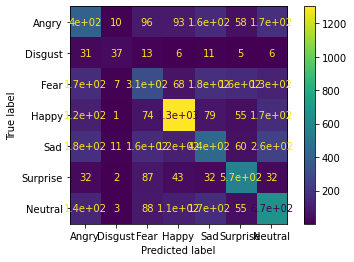

In [ ]:
# display confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model1.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)

cm=confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"])
disp.plot() 

In [ ]:
# results_dict = {}

In [ ]:
results_dict["model3, optimizer:RMSprop, learning rate:0,001, batch size: 64"]="%.3f" % results[1]


In [ ]:
for key, value in results_dict.items():
    print(key, ' : ', value)

model1, optimizer:Adam, learning rate:0,001, batch size: 64  :  0.526
model2, optimizer:Adam, learning rate:0,001, batch size: 64  :  0.556
model3, optimizer:Adam, learning rate:0,001, batch size: 64  :  0.620
model1, optimizer:SGD, learning rate:0,01, batch size: 64  :  0.494
model2, optimizer:SGD, learning rate:0,01, batch size: 64  :  0.486
model3, optimizer:SGD, learning rate:0,01, batch size: 64  :  0.609
model1, optimizer:RMSprop, learning rate:0,001, batch size: 64  :  0.529
model2, optimizer:RMSprop, learning rate:0,001, batch size: 64  :  0.568
model3, optimizer:RMSprop, learning rate:0,001, batch size: 64  :  0.609
